#### seaborn: statistical data visualization

![](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

#### Sources and Contents to review
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

#### Sources and Contents to review 
1. [Seaborn documentation](https://seaborn.pydata.org/index.html)
1. [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
1. [Learn Data Visualization Using Python Seaborn](https://medium.com/edureka/python-seaborn-tutorial-646fdddff322)
1. [Tutorialspoint seaborn](https://www.tutorialspoint.com/seaborn/index.htm)
1. [Seaborn Tutorial](https://www.youtube.com/watch?v=6GUZXDef2U0)
1. [Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

#### **Tutorial**


Official releases of seaborn can be installed from PyPI using pip or can installed usning conda:

In [1]:
# !pip install seaborn
# or
# !conda install seaborn

Import required library to start:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

First few examples:

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

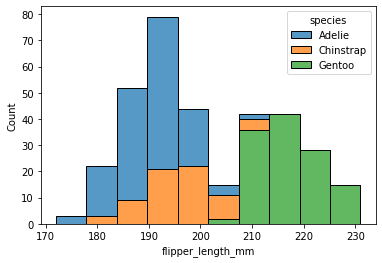

In [3]:
penguins = sns.load_dataset("penguins")
print(penguins.head())
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

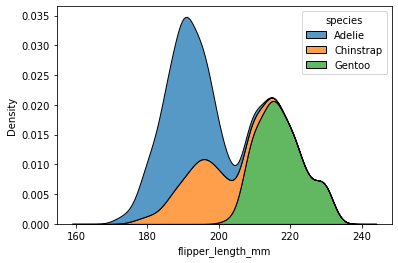

In [4]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#### **Figure-level vs. axes-level functions**

there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function. In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

For example, displot() is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as histplot() behind the scenes:

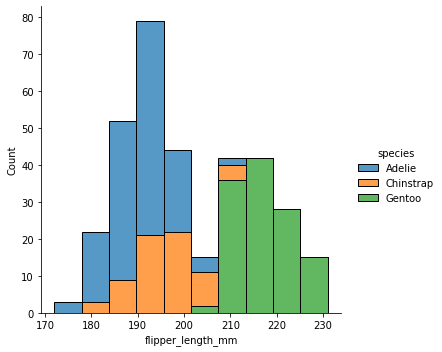

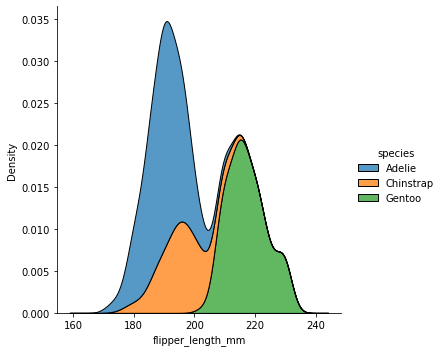

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

#### **Axes-level functions make self-contained plots**

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

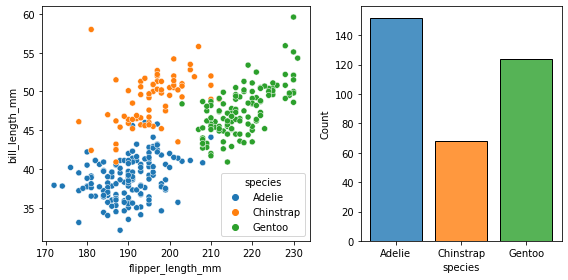

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

#### **Figure-level functions own their figure**
In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

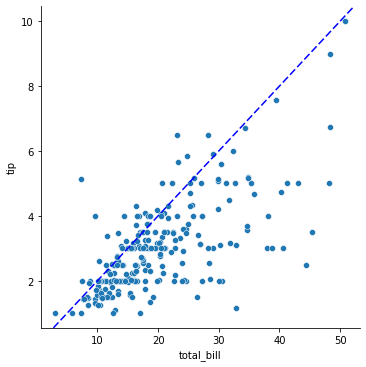

In [7]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

#### **Customizing plots from a figure-level function**
The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

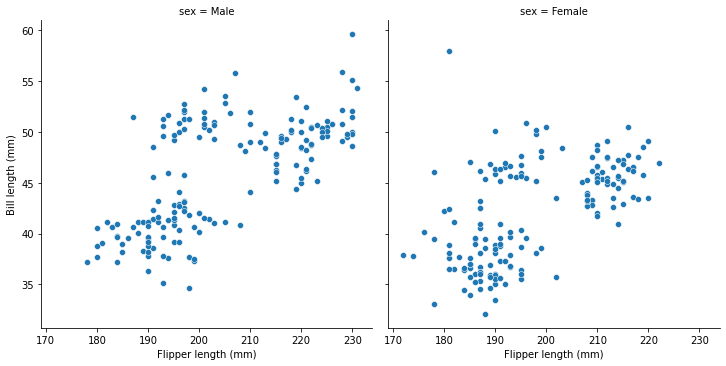

In [8]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

#### **Combining multiple views on the data**
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively. jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

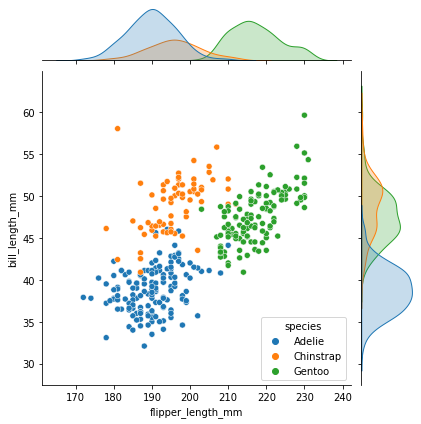

In [9]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Behind the scenes, these functions are using axes-level functions that you have already met (scatterplot() and kdeplot()), and they also have a kind parameter that lets you quickly swap in a different representation:

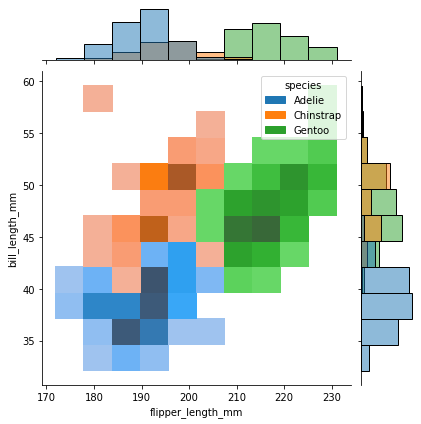

In [10]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

#### **Data structures accepted by seaborn**

As a data visualization library, seaborn requires that you provide it with data. This chapter explains the various ways to accomplish that task.

### Long-form vs. wide-form data
Most plotting functions in seaborn are oriented towards vectors of data. When plotting x against y, each variable should be a vector. Seaborn accepts data sets that have more than one vector organized in some tabular fashion. There is a fundamental distinction between “long-form” and “wide-form” data tables, and seaborn will treat each differently.

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

## Long-form data
A long-form data table has the following characteristics:

* Each variable is a column
* Each observation is a row

In [11]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


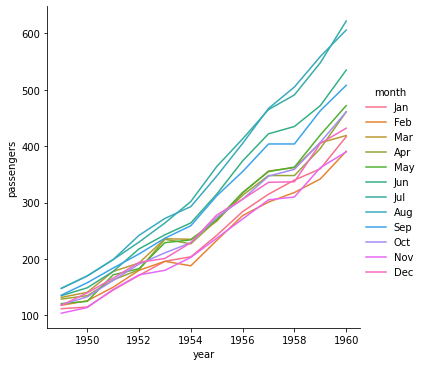

In [12]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

## Wide-form data
For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:

In [14]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


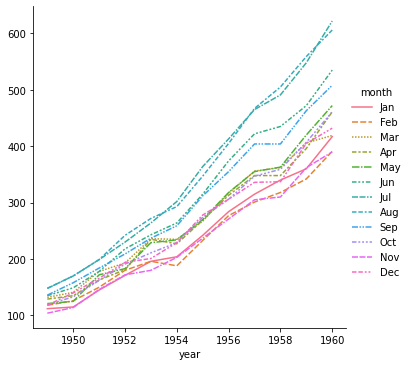

In [15]:
sns.relplot(data=flights_wide, kind="line")

#### **Visualizing statistical relationships**

tatistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

scatterplot() (with kind="scatter"; the default)

lineplot() (with kind="line")

There is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this: